<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/HonGong_ML_DL/22_Visualize_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

### **키워드:** 가중치 시각화, 특성 맵 시각화, 함수형 API

합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해해보자.

In [1]:
# packages
from tensorflow import keras

import matplotlib.pyplot as plt

## 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있고, 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 수행한다. 일반적으로 절편은 시각적으로 큰 의미를 갖지는 않는다.

모델이 학습한 가중치를 체크포인트 파일을 읽어 확인할 수 있다.

In [2]:
path = '/content/drive/MyDrive/Model_checkpoints/best-cnn-model.h5'
model = keras.models.load_model(path)

케라스 모델에 추가한 층은 layers 속성에 저장되어 있다.

In [3]:
model.layers

첫 번째 합성곱 층의 가중치를 조사해보자. 층의 가중치와 절편은 층의 `weights` 속성에 저장되어 있다.

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


`weights` 속성은 텐서플로우의 다차원 배열인 Tensor 클래스의 객체이다. 다루기 쉽도록 넘파이 배열로 바꾼 후 가중치 배열의 평균과 표준편차를 메서드로 계산해보자.

In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.029908843 0.25596046


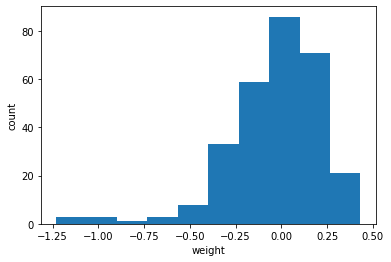

In [6]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

`hist()` 함수에는 1차원 배열을 전달해야하기 때문에 `reshape`를 이용했다.

이번에는 32개의 커널을 출력해보자.

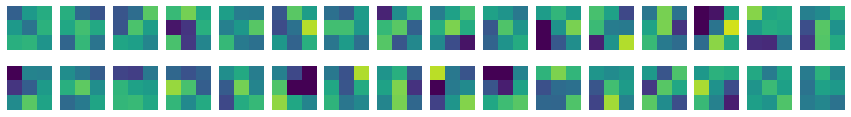

In [7]:
fig, axis = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axis[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axis[i,j].axis('off')
plt.show()

`imshow()`에서는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현한다. 따라서 여러 배열의 픽셀 강도를 비교하기 위해서는 기준값이 필요한데, 이를 위해 위 코드에서 vmin과 vmax로 컬러맵(colormap)에 의해 표현될 범위를 설정하였다.

이번에는 훈련되지 않은 빈 합성곱 층을 만들어 가중치를 시각화해보도록 하겠다.

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


-0.0048868135 0.08559995


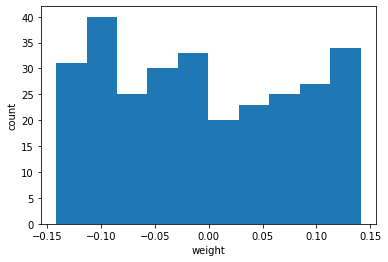

In [9]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

표준편차가 매우 작으며, 대부분의 가중치가 -0.15와 0.15 사이에서 비교적 고른 분포를 보이고 있다. 이는 텐서플로우가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

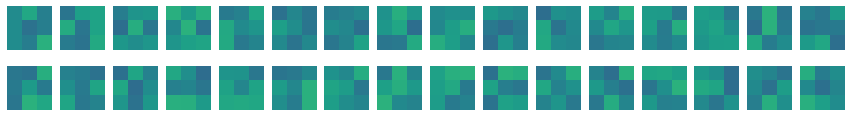

In [10]:
fig, axis = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axis[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axis[i,j].axis('off')
plt.show()

전체적인 가중치가 밋밋하게 초기화되어 있다.

## 함수형 API

지금까지 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했다. 이 클래스는 층을 차례대로 쌓은 모델을 만든다.

하지만 더욱 복잡한 형태의 모델을 구현하기에는 이로는 부족한 경우가 많다. 이를 해결하기 위해 함수형 API(functional API)가 사용되곤 한다.

함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만든다.

예시를 들기 위해 Dense 층 2개로 이루어진 간단한 완전 연결 신경망을 함수형 API로 구현해보도록 하겠다.

In [84]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

기존에는 이를 add해서 Sequential에 넣었지만, 다음과 같이 사용할 수도 있다.

In [85]:
inputs = keras.Input(shape=(784,)) # Sequential에서와 달리 InputLayer 클래스가 수동으로 추가되고 호출되어야 한다.

hidden = dense1(inputs)
outputs = dense2(hidden)

파이썬의 모든 객체는 callable하다. 이는 케라스에서도 마찬가지이다. inputs를 dense1에 통과시켜 hidden을 만들고 이를 dense2의 입력으로 사용하여 출력을 만들 수 있다.

이제 inputs와 outputs를 케라스의 Model 클래스로 연결해주면 된다.

In [86]:
model = keras.Model(inputs, outputs)

In [90]:
model = keras.models.load_model(path)
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.

In [91]:
conv_acti = keras.Model(model.input, model.layers[0].output)

model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환한다. 하지만 conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환할 것이다.

이를 이용하면 특성 맵을 시각화 할 수 있다.

## 특성 맵 시각화

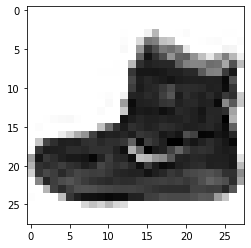

In [92]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

In [93]:
inputs = X_train[0:1].reshape(-1, 28, 28, 1) /255.0
feature_maps = conv_acti.predict(inputs)

In [94]:
print(feature_maps.shape)

(1, 28, 28, 32)


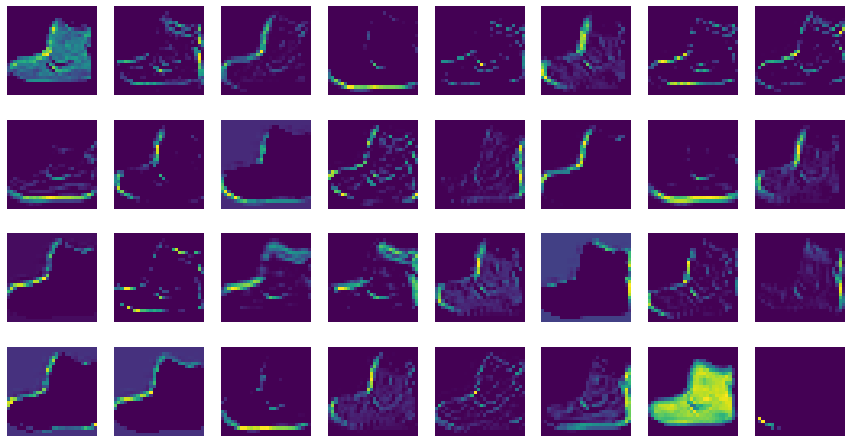

In [97]:
fig, axis = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axis[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axis[i,j].axis('off')
plt.show()

In [98]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [99]:
inputs = X_train[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [100]:
print(feature_maps.shape)

(1, 14, 14, 64)


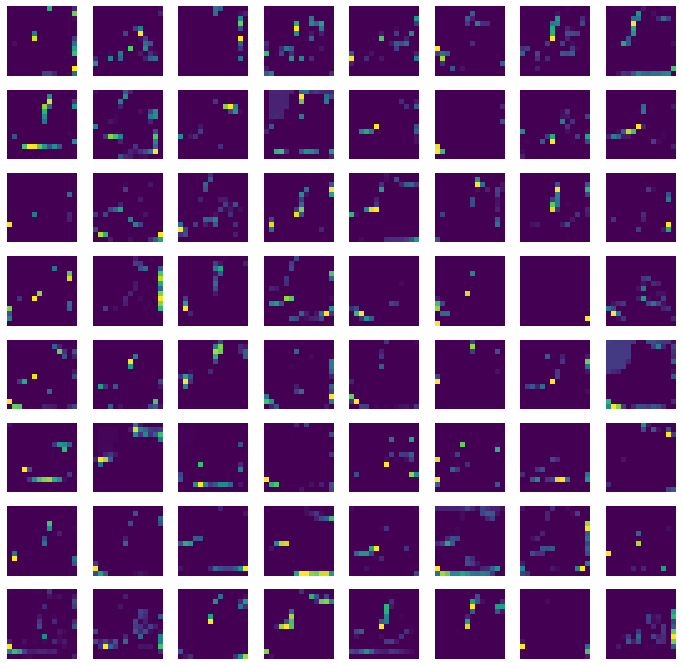

In [101]:
fig, axis = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axis[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axis[i,j].axis('off')
plt.show()